𝗥𝗢𝗦𝗛𝗔𝗡 𝗕𝗛𝗔𝗧𝗜𝗔

𝗚𝗥𝗜𝗣 𝗧𝗔𝗦𝗞#𝟭

𝗣𝗿𝗲𝗱𝗶𝗰𝘁 𝘁𝗵𝗲 𝗽𝗲𝗿𝗰𝗲𝗻𝘁𝗮𝗴𝗲 𝗼𝗳 𝗮𝗻 𝘀𝘁𝘂𝗱𝗲𝗻𝘁 𝗯𝗮𝘀𝗲𝗱 𝗼𝗻 𝘁𝗵𝗲 𝗻𝗼. 𝗼𝗳 𝘀𝘁𝘂𝗱𝘆 𝗵𝗼𝘂𝗿𝘀.
𝗨𝘀𝗶𝗻𝗴 𝗦𝘂𝗽𝗲𝗿𝘃𝗶𝘀𝗲𝗱 𝗠𝗮𝗰𝗵𝗶𝗻𝗲 𝗟𝗲𝗮𝗿𝗻𝗶𝗻𝗴

IMPORTING REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
print("DATA SUCESSFULLY IMPORTED")
data.head()

DATA SUCESSFULLY IMPORTED


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


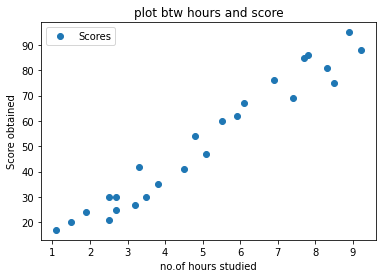

In [6]:
#distribution of hours vs score
data.plot(x="Hours",y="Scores",style="o")
plt.xlabel("no.of hours studied")
plt.ylabel("Score obtained")
plt.title("plot btw hours and score")
plt.show()

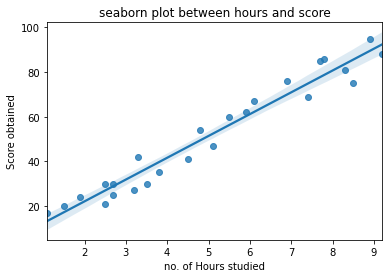

In [7]:
#plotting seaborn regression plot to determine the relation between target and feature 
data = pd.read_csv("http://bit.ly/w-data")
sns.regplot(x=data["Hours"],y=data["Scores"],data=data)
plt.title("seaborn plot between hours and score")
plt.xlabel("no. of Hours studied")
plt.ylabel("Score obtained")
plt.show()


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

data cleaning not required


In [9]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [10]:
#form scikit learn built in function train test split and splitting data successfully
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=4)


In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
print("coefficient=", model.coef_)
print("intercept:", model.intercept_)


coefficient= [9.87764451]
intercept: 3.0691187993490487


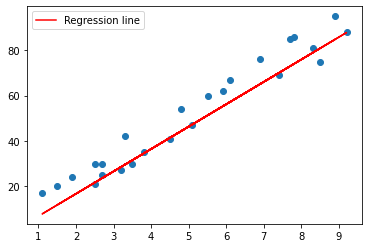

In [13]:
line= model.coef_*x - model.intercept_

plt.scatter(x,y)
plt.plot(x, line, color="red", label="Regression line")
plt.legend()
plt.show()

MAKING PREDICTIONS
                    
    

In [14]:
y_preds = model.predict(X_test)

In [15]:
#comparing actual and predicted outcomes
df=pd.DataFrame({"Actual":y_test,"Predicted":y_preds})
df


,Actual,Predicted
0,35,40.604168
1,54,50.481812
2,21,27.763230
3,75,87.029097
4,41,47.518519


In [16]:
#training score vs tessting score
print("Training score:",model.score(X_train,y_train))
print("Testing Score:",model.score(X_test,y_test))


Training score: 0.9644771934967826
Testing Score: 0.8345792140066828


 PRIDICTING SCORE WHEN STUDENT STUDY FOR 9.5 hrs?

In [17]:
hours=9.25
test=np.array([hours])
test=test.reshape(-1,1)
new_pred= model.predict(test)
print("no. of hours=",hours)
print("pridicted score=",new_pred)


no. of hours= 9.25
pridicted score= [94.43733048]


EVALUATING MODEL


In [19]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_preds))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,y_preds))

Mean Absolute Error: 6.8866403471761775
Mean Squared Error: 55.343178161924186
